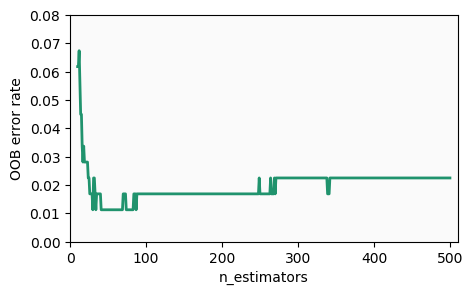

In [1]:
#!/usr/bin/env python
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

# Set random state for debugging only
RANDOM_STATE = 42

# Load data set from sklearn
X, y = datasets.load_wine().data, datasets.load_wine().target


#########################################
### Find ideal number of n_estimators ###
#########################################

# Range of 'n_estimators' values to explore
min_estimators = 10
max_estimators = 500

# Set up random forest classifier
clf = RandomForestClassifier(n_estimators='warn', criterion='gini', 
                             oob_score=True, max_features='sqrt',
                             random_state=RANDOM_STATE, n_jobs=-1)

error_rate = []
for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X, y)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - clf.oob_score_
    error_rate.append((i, oob_error))

    
# Get X and Y from error_rate list by zip and unpack
xs, ys = zip(*error_rate)

# Print OOB error rates for n_estimators
plt.figure(figsize=[5, 3], dpi=100)
plt.rcParams['axes.facecolor'] = '#fafafa'

plt.plot(xs, ys, color="#20936d", lw=2)

plt.xlim(min_estimators-10, max_estimators+10)
plt.ylim(0, 0.08)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

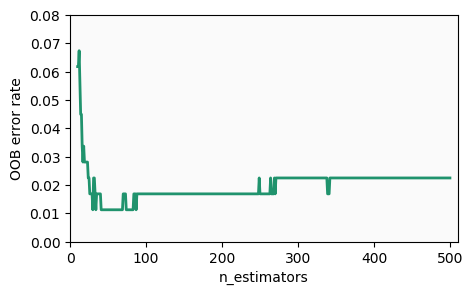

In [2]:
# Get X and Y from error_rate list by zip and unpack
xs, ys = zip(*error_rate)

# Print OOB error rates for n_estimators
plt.figure(figsize=[5, 3], dpi=100)
plt.rcParams['axes.facecolor'] = '#fafafa'

plt.plot(xs, ys, color="#20936d", lw=2)

plt.xlim(min_estimators-10, max_estimators+10)
plt.ylim(0, 0.08)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

In [3]:
wine_attributes = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity',  
                   'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/315', 'Proline']

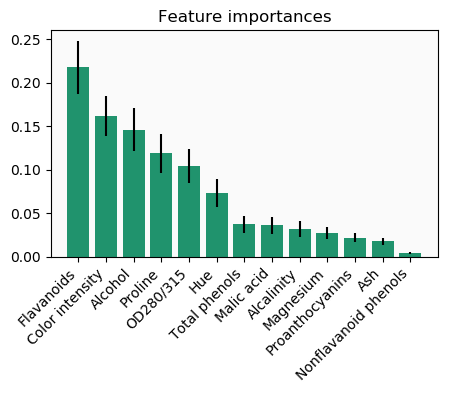

In [4]:
############################### 
### Plot feature importance ###
###############################

from scipy import stats

# Run fit with optimal number of estimators (set by hand)
number_estimators = 50
clf.set_params(n_estimators=number_estimators)
clf.fit(X, y)

# Get feature importance and calcualte STD and SEM
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
sem = stats.sem([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Get indices that are needed to sort
indices = np.argsort(importances)[::-1]

# Apply indices on wine_attributes to sort properly
wine_attributes_sorted = np.array(wine_attributes)[indices] 

# Plot the feature importances of the forest
plt.figure(figsize=[5, 3], dpi=100)
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="#20936d", 
        yerr=sem[indices], align="center")
plt.xticks(range(X.shape[1]), wine_attributes_sorted, rotation=45, 
           ha='right')
plt.xlim([-1, X.shape[1]])
plt.show();